## <a id='top'></a>

# CSCI 3202, Fall 2020
# Assignment 4
# Due: Wednesday 25 November 2020 by 11:59 PM

<br> 

### Your name: Jacob (Jake) Henson - 105963531

<br> 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import unittest


---
## Problem 1: Navigating an awkward situation with grace and poise

<img src='https://www.explainxkcd.com/wiki/images/5/5f/interaction.png' style="width: 600px;"/>


Suppose you are at a social event where you would like to avoid any interaction with a large number of the other attendees. It's not that you don't like them, it's just that you don't like *talking to* them. A few of your good friends are also in attendance, but they are tucked away in a corner. The rectangular room in which the event is being held spans gridcells at $x=1,2,\ldots, 6$ and $y=1,2,\ldots, 5$. At the eastern edge ($x=6$) of this first floor room, there is a balcony, with a 6-foot drop. If the event becomes unbearably awkward, you can jump off the balcony and run away. Of course, this might hurt a little bit, so we should incorporate this into our reward structure.

The terminal states and rewards associated with them are given in the diagram below. The states are represented as $(x,y)$ tuples. The available actions in non-terminal states include moving exactly 1 unit North (+y), South (-y), East (+x) or West (-x), although you should not include walking into walls, because that would be embarrassing in front of all these other people. Represent actions as one of 'N', 'S', 'E', or 'W'. For now, assume all non-terminal states have a default reward of -0.01, and use a discount factor of 0.99.

<img src="http://www.cs.colorado.edu/~tonyewong/home/resources/hw06_mdp.png" style="width: 400px;"/>

Use the following transition model for this decision process, if you are trying to move from state $s$ to state $s'$:
* you successfully move from $s$ to $s'$ with probability 0.6
* the remaining 0.4 probability is spread equally likely across state $s$ **and** all adjacent (N/S/E/W) states except for $s'$. Note that this does not necessarily mean that all adjacent states have 0.1, because some states do not have 4 adjacent states.


### (1a)

Complete the `MDP` class below. The docstring comments provide some desired specifications. You may add additional methods or attributes, if you would like.

In [36]:
class MDP:
    def __init__(self, nrow, ncol, terminal, default_reward, discount):
        '''Create/store the following attributes:
        states -- list of all the states (x,y) tuples
        terminal_states -- is a dictionary with terminal state keys, and rewards as values
        default_reward -- is the reward for being in any non-terminal state
        df -- discount factor
        ... and anything else you decide will be useful!
        '''
        
        self.nrow = nrow
        self.ncol = ncol
        self.states = [(x,y) for x in range(1,ncol+1) for y in range(1,nrow+1)]
        self.terminal_states = terminal
        self.default_reward = default_reward
        self.df = discount        
        

    def actions(self, state):
        '''Return a list of available actions from the given state.
        [None] are the actions available from a terminal state.
        '''
        
        
        if state in self.terminal_states:
            return [None]
        else:
            avaliable_actions = []
            if state[0] > 1: #if x is greater than 1 i.e., path to move west 
                # can move West
                avaliable_actions.append("W")
            if state[0] < self.ncol: #if x is less than the number of rows total, i.e., path to move east
                # can move East
                avaliable_actions.append("E")
            if state[1] > 1: #if y is greater than 1, i.e., path to move south 
                # can move South
                avaliable_actions.append("S")
            if state[1] < self.nrow: #if y less than the number of rows, i.e., path to move north 
                # can move North
                avaliable_actions.append("N")
        
        return avaliable_actions 
        
        
    def reward(self, state):
        '''Return the reward for being in the given state'''
        
        return self.terminal_states[state] if state in self.terminal_states.keys() else self.default_reward
        
        
    def result(self, state, action):
        '''Return the resulting state (as a tuple) from doing the given
        action in the given state, without uncertainty. Uncertainty
        is incorporated into the transition method.
        state -- a tuple representing the current state
        action -- one of N, S, E or W, as a string
        '''
    
        assert action in self.actions(state), 'Error: action needs to be available in that state'
        assert state in self.states, 'Error: invalid state'
        
#         if action == None:
#             return state #return the current state 

        if action == "N":
            return (state[0], state[1]+1) #go north 
        if action == "S":
            return (state[0], state[1]-1) #go south 
        if action == "E":
            return (state[0]+1, state[1]) #go east
        if action == "W":
            return (state[0]-1, state[1]) #go west 
        
                
    def transition(self, state, action):
        '''Return the probabilities and subsequent states associated
        with taking the given action from the given state. Can be done
        however you want, so that it works with your value/policy iteration.
        '''
        
        if action is None:
            return [(0, state)]
        else:
            avaliable_actions = self.actions(state)
            total_actions = len(avaliable_actions)

            #determine probability of success and fail states 
            P_success_state = 0.6; 
            P_others = 0.4 / total_actions
        
            #set up previous states
            # a list of tupes from current to total actions
            transition_states = []
           
            #get the actions from all avaliable ones! 
            for act in avaliable_actions:
                 #if we're at the current action
                if(act == action):
                    #append tuple pair of success and current action 
                    transition_states.append( (P_success_state, self.result(state, act)) )
                #otherwise, carry on with the normal reverse induction step 
                else:
                    transition_states.append( (P_others, self.result(state, act)))
                    
                
            return transition_states            

**Now:** create an `MDP` object to represent the decision process in this problem.

To test and get comfortable with your `MDP` class methods and attributes, and making the relevant calculations with this structure, calculate the expected utility of walking north from (1,1). Assume initially that all states $(x,y)$ have a utility of $x+y$ (including the terminal states).

In [37]:
nrow = 5
ncol = 6
terminal = {
    (1,3):-1,
    (1,4):+2,
    (1,5):+2,
    (2,1):-1,
    (3,1):-1,
    (3,4):-1,
    (3,5):+1,
    (4,3):-1,
    (4,4):-1,
    (6,1):-5,
    (6,2):-5,
    (6,3):-5,
    (6,4):-5,
    (6,5):-5,
    (6,3):-5,
}
default_reward = -0.01
discount = 0.99

MDP_test = MDP(nrow, ncol, terminal, default_reward, discount)

util_11 = MDP_test.result((1,1), 'N') #util of walking N from 1,1
print("Utility of moving north from (1,1): ", np.sum(util_11))

Utility of moving north from (1,1):  3


#### Unit tests
Note that these are non-exhaustive, because there is some flexibility in how the `transition` method works.

In [38]:
tests_to_run = unittest.TestLoader().loadTestsFromModule(Tests_Problem1())
unittest.TextTestRunner().run(tests_to_run)

......
----------------------------------------------------------------------
Ran 6 tests in 0.007s

OK


<unittest.runner.TextTestResult run=6 errors=0 failures=0>

### (1b)

Implement value iteration to calculate the utilities for each state.  Also implement a function that takes as arguments an `MDP` object and a dictionary of state-utility pairs (key-value) and returns a dictionary for the optimal policy.  The optimal policy dictionary should have state tuples as keys and the optimal move (None, N, S, E or W) as values.

In [39]:
def value_iteration(mdp, tol=1e-3):
    utility_new = { s : 0 for s in mdp.states}
    while True: 
        
        utility_old = utility_new.copy()
        max_change = 0
        
        #check for each and every state 
        for s in mdp.states: 
            next_states = [mdp.transition(s, act) for act in mdp.actions(s)]
            
            best_utility = -999; 
            
            #calculate max espected utility! 
            for k in range(len(next_states)):
                newsum = sum([next_states[k][j][0]*utility_old[next_states[k][j][1]] for j in range(len(next_states[k]))])
                best_utility = max(best_utility, newsum)
            
            utility_new[s] = mdp.reward(s) + mdp.df * best_utility
            
            max_change = max(max_change, abs(utility_new[s]-utility_old[s]))
        
        # if maximum change in utility from one iteration to the
        # next is less than some tolerance, break
        if((mdp.df == 1 and max_change < 1) or (max_change < tol*(1-mdp.df)/mdp.df)):
            break; 
    
    return utility_new
    
    

def find_policy(mdp, utility):
    policy = {s : None for s in mdp.states}
    
    for s in mdp.states: 
        best_utility = (-999, None)
        
        for act in mdp.actions(s):
            newsum = sum([p*utility[s2] for p, s2 in mdp.transition(s,act)])
            
            #if this action has a higher expected utility than current best, replace the best
            #(utility, action) tuple with this one 
            
            if (newsum > best_utility[0]):
                best_utility = (newsum, act)
              
            
        policy[s] = best_utility[1]
    
    return policy
    
    

Now actually use your `value_iteration` and `find_policy` functions to calculate the utility for each state in this MDP, and the optimal action in each state.

As a sanity check, print the utilities of these terminal states:
1. `utility[(1,5)]`
1. `utility[(6,1)]`

and print the utility of these states that are nearby to terminal states, so their utilities should be similar to the nearby terminal states' utilities:
1. `utility[(2,5)]`
1. `utility[(5,3)]`

And print the policy for these states to make sure they make sense:
1. `policy[(2,4)]`
1. `policy[(1,1)]`

In [40]:
utility = value_iteration(MDP_test)
policy = find_policy(MDP_test, utility)

print("1. utility[(1,5)]", utility[(1,5)])
print("2. utility[(6,1)]", utility[(6,1)])
print("-----")
print("1. utility[(2,5)]", utility[(2,5)])
print("2. utility[(5,3)]", utility[(5,3)])
print("-----")
print("1. policy[(2,4)]", policy[(2,4)])
print("2. policy[(1,1)]", policy[(1,1)])

#all of these make sense! yay! 

1. utility[(1,5)] 2.0
2. utility[(6,1)] -5.0
-----
1. utility[(2,5)] 1.481140420445742
2. utility[(5,3)] -1.201331059971377
-----
1. policy[(2,4)] W
2. policy[(1,1)] N


### (1c)

If we enter the room at (5,1), what is the optimal path for us to follow?  Create a graphic to illustrate this policy pathway, either by generating a plot in Python (like the maze solution path) or by uploading a hand-drawn image and including it below.

In [41]:
def testpath(state, mdp):
    utility = value_iteration(MDP_test)
    policy = find_policy(MDP_test, utility)
    
    current_path = [state]
    s = state
    while True: 
        act = policy[s]
        s = mdp.result(s,act)
        if s in mdp.terminal_states:
            current_path.append(s) #append the best found state new pathway 
            return current_path
        
        
        current_path.append(s)
        
    return current_path

testpath((5,1), MDP_test)       
        

[(5, 1), (4, 1), (4, 2), (3, 2), (2, 2), (2, 3), (2, 4), (1, 4)]

![1c diagram](henson_1c_diagram.png)


A drawing I made of the above path(note that it starts at (5,1) and ends at (1,4)

### (1d)

From (3,2) the optimal move is to walk West. If we are trying to go talk to our friends in the Northwest corner, why would we rather do this than walk North first, then West?

**We would rather move West from (3, 2) because if we immediately move North, this puts us closer to a bunch of states((4,3), (4,4), and (3,4)) with a negative utility/reward. Going West instead (to (2,2)), there's only 1 neighbor from this state that has a negative value, so it makes sense to travel to a space with less negative neighboring values, which results in a slightly higher utility score (i.e., go West).** There is less likelyhood we take a worse action if we go West, and it makes much more sense given the higher utility score. This is proven below: 

In [42]:
print("utility[(2,2)]", utility[(2,2)])
print("utility[(3,3)]", utility[(3,3)])

utility[(2,2)] 0.3280535322271888
utility[(3,3)] 0.22632424013469965


### (1e)

How painfully awkward do you need to set the default reward for non-terminal states before the optimal move from (5,1) becomes jumping off the balcony immediately and running away?  Round your answer to two decimal places.

In [43]:
def how_awkward():
    
    default_reward = -0.01;
    initial_state = (5,1);
    discount = 0.99;
    
    #keep iterating the default_reward until we just yeet ourselves off the balcony, i.e., go east at (5,1)
    while(policy[initial_state] != 'E'): 
        
        new_mdp = MDP(nrow, ncol, terminal, default_reward, discount)
        utilitynew = value_iteration(new_mdp)
        policynew = find_policy(new_mdp, utilitynew)
        
        if(policynew[(5,1)] == 'E'):
            break; 
        else:
            default_reward -= .01;
            
    return round(default_reward,2)

    

paintfully_awkward = how_awkward()
print("default reward for non terminal states would have to be set to:")
print(paintfully_awkward)
print("in order for the optiminal move would be to go East and jump off the balcony")

default reward for non terminal states would have to be set to:
-2.77
in order for the optiminal move would be to go East and jump off the balcony


### (1f)

In **1e** we assumed a certain level of loss (negative reward) just for being present.  But a more realistic approach might be to instead change the reward structure for the terminal states. Consider the terminal states with -1 reward in the default model. Let $R^*$ denote the reward associated with these states. How low does $R^*$ need to be in order for us to immediately jump off the balcony and run away? Use the default non-terminal state reward of -0.01. Write a few sentences interpreting your result.

In [44]:
def how_awkward_with_terminal_states():
    
    default_reward = -0.01;
    initial_state = (5,1);
    discount = 0.99;
    r = -1; #value to be lowering, initilaize at starting -1 

    #keep iterating the default_reward until we just yeet ourselves off the balcony, i.e., go east at (5,1)
    while(policy[initial_state] != 'E'):     
        #new terminal, only adjust the TERMINAL states which aren't the default 
        #so, (1,3),(2,1),(3,1),(3,4),(4,3), and (4,4)
        new_terminal = {
            (1,3): r,
            (1,4):+2,
            (1,5):+2,
            (2,1): r,
            (3,1): r,
            (3,4): r,
            (3,5):+1,
            (4,3): r,
            (4,4): r,
            (6,1):-5,
            (6,2):-5,
            (6,3):-5,
            (6,4):-5,
            (6,5):-5,
            (6,3):-5,
        }
        
        newer_mdp = MDP(nrow, ncol, new_terminal, default_reward, discount)
        utilitynewer = value_iteration(newer_mdp)
        policynewer = find_policy(newer_mdp, utilitynewer)
        
        if(policynewer[(5,1)] == 'E'):
            break; 
        else:
            r -= 1;
            
    return round(r,2)

    

seriously_awkward = how_awkward_with_terminal_states()
print("the R* value for terminal states would have to be set to:")
print(seriously_awkward)

the R* value for terminal states would have to be set to:
-37


**For my $R^*$, I got -37. The value for these terminal states would have to be -37 before we decided to jump off of the balcony. This result seems a little bit high**

### (1g)

Given the problem context, write a few sentences about why this is or is not an appropriate transition model. Include an interpretation of the terminal states.

**This is probably a somewhat appropriate transition model, given that we're a very socially awkward person and we really dislike conversation with new people. With the terminal states (talking to a new person) this assumes there's automatically a negative aspect of that, and that we really enjoy talking to our friends, which makes sense if we're very socially awkward or introverted!**

**However, I think the negative reward of jumping off the balcony may be a little too low - this implies that talking to 5 new people is the same as literally jumping off a balcony and possibly really hurting yourself!**

<br>

---

## Problem 2: HMMs

You are trying to diagnose whether your computer is broken or not. On a given day, your computer's hidden state is either *broken* or *working*. Each day you make one of the following observations: *blue-screen*, *slow*, or *snappy*, depending on the state of your computer. You decide to use the following HMM to model your daily observations. Note, "Emission Distribution" is another way to descibe the "Sensor Distribution".

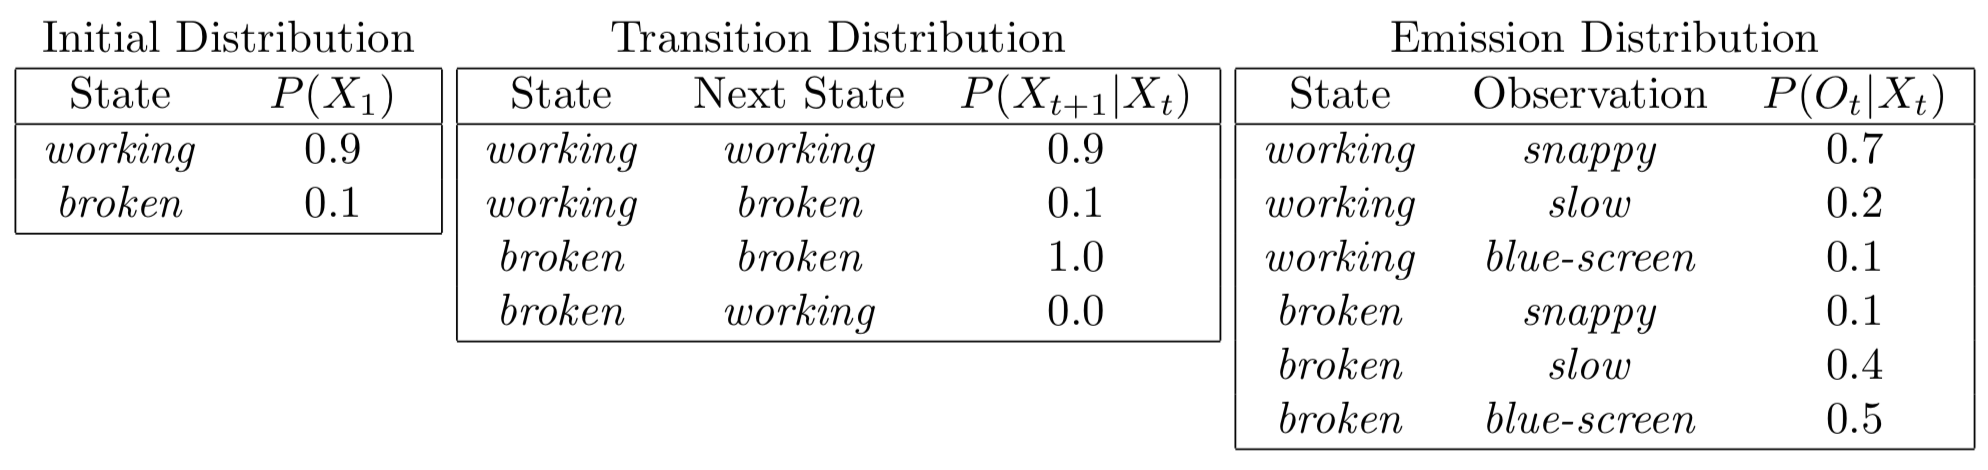


### (2a)
What is the posterior distribution of $X_1$, your computer's state on day one, given the observation (*slow*) on day 1? In other words, find $P(X_1 | E_1 = \textit{slow})$.

$$P(X_1 | E_1 = \textit{slow}) = \alpha  P(E_{t+1}|X_{t+1}) \sum_{x_t} P(X_{t+1}|X{t})P(X_{t}|E_{1:t})$$

$$ = \alpha  P(E_{t+1}|X_{t+1}) \sum_{x_t} P(X_{t+1}|X_{t})P(X_{t}|E_{1:t})$$

$$ = \alpha  P(E_{t+1}|X_{t+1}) P(X_{t+1})$$

$$ = \alpha  P(E_{t+1}|X_{t+1}) P(X_{t+1})$$

???




### (2b)
What is the posterior distribution of $X_2$, your computer's state on day two, given the observation sequence (*slow*, *slow*)?

???

<br>

---

## Problem 3: your very own MDP

For this problem, you do not need to write any code, but rather communicate your ideas clearly using complete sentences and descriptions of the concepts the questions ask about. You can, of course, include some pseudocode if it helps, but that is not strictly necessary.

### (3a)

Describe something you think would be interesting to model using a Markov decision process.  Be **creative** - do not use any examples from your homework, class, or the textbook, and if you are working with other students, please **come up with your own example**. There are so, SO many possible answers!

**For my Markov decision process, I think it would be interesting to model out a senario in which you shop at a PC store, and given a certain amount of money, decide what to upgrade on your current PC. The ultimate goal would be, given an amount of money what route would you be best off taking through the store in order to ensure you get the best outcome? I'll assume that certain PC parts need an upgrade (for the purposes of this example) and certain ones do not, yet you can travel to any section of the store. If you travel to a given section, maybe you have a high proability of buying the part depending on how much money you have! (because of course, we all get distracted by the newest shiniest thing!)**

**To start, I'll assume that any possible part on the PC could be upgraded independently of each other, and that you feasably have enough money to buy a decent amount of parts, but not everything in store. You want to save money and not be broke, but you also want to get some good upgrades**

**Each part you buy (or don't buy) could be associated with a certain postitive/negative reward value. Obviously, you'd have utility if you save money, too, but not more than buying parts. If you buy parts you don't need, then that's a bad thing because you wasted money**

### (3b)

What are the states associated with your MDP?

**INITAL CONDITIONS**
- You have a set amount of money when going into the store 
- You can leave the store at any time, but the exit is on the other side of the store so you must past through at least 5 sections before you leave 
- You have a given probability of buying/NOT BUYING an item at a certain section, although as you spend money the probability of buying DECREASES 
- Any parts have the possiblity to upgrade, though not all of the reward associated with these is good if you don't *need* the upgrade
- Let's assume the states are in some sort of order: 

**STATES**
- Graphics card section - Buy a graphics card / Do not buy a graphics card 
- CPU section - Buy a CPU / Do not buy a CPU 
- Peripherals Section (i) - Buy a keyboard + mouse / Do not buy a keyboard + mouse 
- Peripherals Section (ii) - Buy a monitor / Do not buy a monitor
- PSU section - Buy a power supply / Do not buy a power supply
- RAM section (i) - Buy 16GB of RAM / Do not buy 16GB of RAM
- RAM section (ii) - Buy 32GB of RAM / Do not buy 32GB of RAM
- Exit - Leave the store

### (3c)

What is the reward structure associated with your MDP?  Include a discussion of terminal/non-terminal states.

**Let's assume the PC needs an upgrade for the motherboard, graphics card, and Power Supply. In this example, I'll assign reward to each state based on this condition!**

**NON TERMINAL STATES**
- Going to any section and NOT spending money (0 utility) 
- Leaving the store (0 utility) 

**TERMINAL STATES**
- Buying a motherboard (+4) 
- Buying a graphics card (+5) 
- Buying a power supply (+4) 
- Buying a CPU (-1) 
- Buying a Keyboard + mouse (-1) 
- Buying a Monitor (-4) 
- Buying 16GB of RAM (-1) 
- Buying 32GB of RAM (-4) 
- Having no money left (-1)
- Having some money left (+2)
- Having all of your money left (-2)

### (3d)

What are the actions and transition model associated with your MDP?

**ACTIONS**
- Go to a section, and based on the probability....
    - Either buy a part
    - Or do not buy a part 
- Go to another section (P(0.2))
    - Including leave the store (the exit is also a section)
    
**TRANSITION MODEL**
- I'd like to simply use a similar value based and policy like we used in the first problem. Currently, this makes the most sense to me for this type of problem, given that it's relatively simple enough to not warrant a more complex approach

### (3e)

Interpret what an optimal policy represents in the context of your particular MDP.

**An optimal policy would likely be maximizing the utility - a combination of states and their corresponding actions will result in the highest utility. In the context of this problem, what combination of places to visit in the store + parts we buy would result in the highest overall utility?**

**It would make sense to attempt to see, given inital conditions and different combinations of parts/probability of buying each part at a section given a certain amount of money would be super interesting. It would make sense that if there are certain parts we definitely want to buy (higher utility associated with them) that we would be inclined to visit these sections more often before leaving, thereby resulting in a higher likelyhood we purchase the part.**

## Unit test

In [45]:
class Tests_Problem1(unittest.TestCase):
    def setUp(self):
        nrow = 3
        ncol = 3
        default_reward = -0.2
        discount = 0.5
        terminal = {(1,3):-1, (1,2):2}
        self.mdp = MDP(nrow, ncol, terminal, default_reward, discount)
    def test_actions_some(self):
        self.assertEqual(set(self.mdp.actions((2,2))) == {'N','S','E','W'}, True)
    def test_actions_few(self):
        self.assertEqual(set(self.mdp.actions((1,1))) == {'N','E'}, True)
    def test_actions_none(self):
        self.assertEqual(set(self.mdp.actions((1,2))) == {None}, True)
    def test_reward_t(self):
        self.assertEqual(self.mdp.reward((1,2)) == 2, True)
    def test_reward_nt(self):
        self.assertEqual(self.mdp.reward((2,2)) == -0.2, True)
    def test_result_nt(self):
        self.assertEqual(self.mdp.result((1,1), 'N') == (1,2), True)